In [5]:
import pandas as pd

# Step 1: Load both CSVs (make sure they are in the SAME folder as this notebook)
hist = pd.read_csv("historical_data.csv")
fg   = pd.read_csv("fear_greed_index.csv")

print("Historical trades shape:", hist.shape)
print("Fear-Greed index shape:", fg.shape)


Historical trades shape: (211224, 16)
Fear-Greed index shape: (2644, 4)


In [9]:
# Step 2: Prepare date columns

# Historical trades (dd-mm-yyyy format, so use dayfirst=True)
hist["date"] = pd.to_datetime(hist["Timestamp IST"], dayfirst=True, errors="coerce").dt.date

# Fear-Greed index
fg["date"] = pd.to_datetime(fg["date"], errors="coerce").dt.date
fg = fg[["date", "classification"]].rename(columns={"classification": "sentiment"})


In [11]:
# Step 3: Merge on date
merged = hist.merge(fg, on="date", how="left")
print("Merged shape:", merged.shape)
print(merged.head())


Merged shape: (211224, 18)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID

In [13]:
# Step 4: Save merged file
merged.to_csv("merged_trades_with_sentiment.csv", index=False)
print("✅ Merged file saved as merged_trades_with_sentiment.csv")


✅ Merged file saved as merged_trades_with_sentiment.csv


In [15]:
print(merged.head(10))   # look at first 10 rows
print(merged.tail(10))   # look at last 10 rows
print(merged["sentiment"].value_counts())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
5  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9900   
6  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9934   
7  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   
8  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   
9  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      

In [17]:
merged.to_csv("merged_trades_with_sentiment.csv", index=False)
print("Merged file saved ✅")


Merged file saved ✅


In [19]:
# Overall stats
print(merged.describe())

# Average PnL per sentiment
print(merged.groupby("sentiment")["Closed PnL"].mean())

# Number of trades per sentiment
print(merged.groupby("sentiment")["Account"].count())


       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min   -117990.104100  1.732711e+08      -1.175712

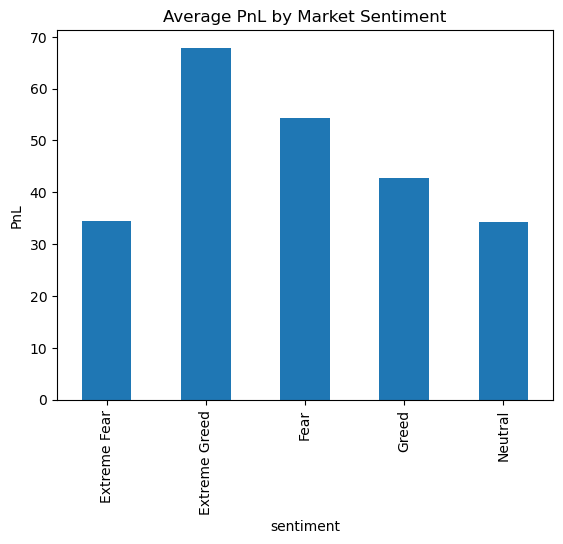

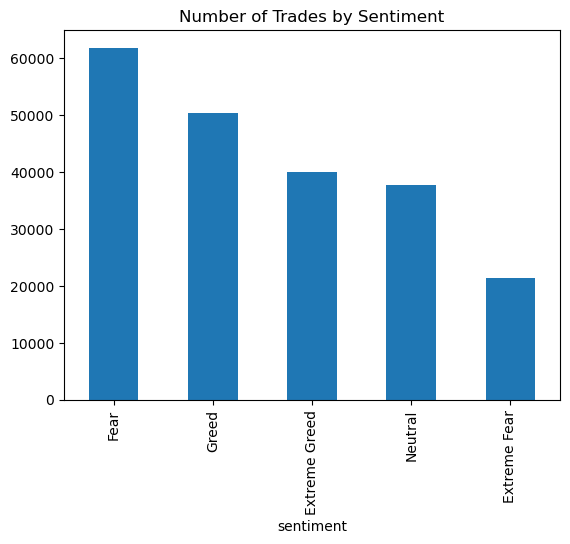

In [21]:
import matplotlib.pyplot as plt

# Average PnL per sentiment
merged.groupby("sentiment")["Closed PnL"].mean().plot(kind="bar")
plt.title("Average PnL by Market Sentiment")
plt.ylabel("PnL")
plt.show()

# Number of trades per sentiment
merged["sentiment"].value_counts().plot(kind="bar")
plt.title("Number of Trades by Sentiment")
plt.show()


sentiment
Extreme Fear     37.060748
Extreme Greed    46.494299
Fear             42.076750
Greed            38.482794
Neutral          39.699093
Name: is_win, dtype: float64


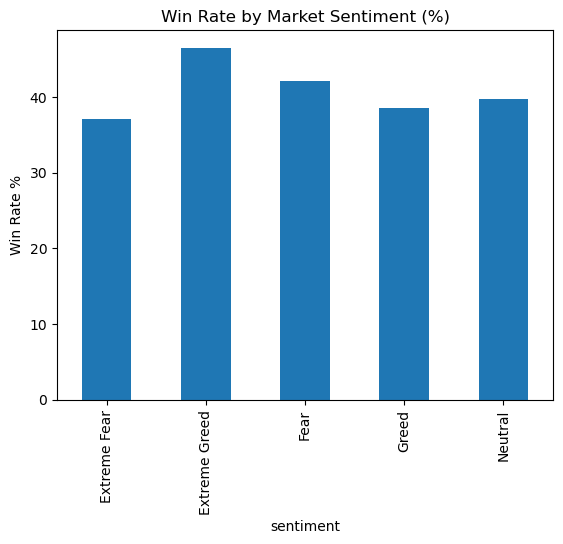

In [23]:
# Create win/loss flag
merged["is_win"] = (merged["Closed PnL"] > 0).astype(int)

# Win rate per sentiment
win_rates = merged.groupby("sentiment")["is_win"].mean() * 100
print(win_rates)

# Plot
win_rates.plot(kind="bar")
plt.title("Win Rate by Market Sentiment (%)")
plt.ylabel("Win Rate %")
plt.show()


        date      sentiment  Closed PnL
0 2023-05-01          Greed    0.000000
1 2023-12-05  Extreme Greed    0.000000
2 2023-12-14          Greed -205.434737
3 2023-12-15          Greed  -24.632034
4 2023-12-16          Greed    0.000000


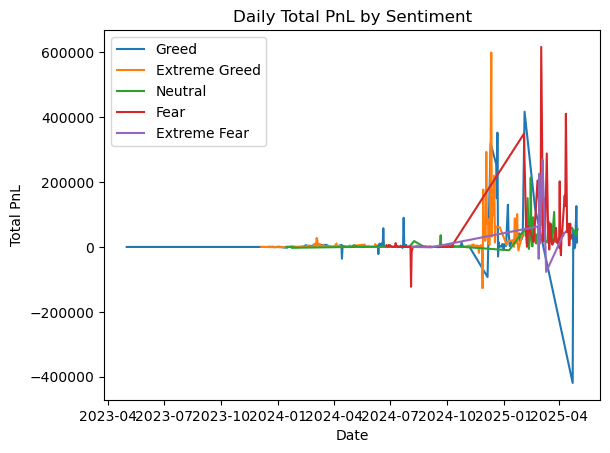

In [25]:
# Convert date column to datetime
merged["date"] = pd.to_datetime(merged["date"])

# Group by date + sentiment
daily_pnl = merged.groupby(["date", "sentiment"])["Closed PnL"].sum().reset_index()

print(daily_pnl.head())

# Plot for each sentiment separately
for s in daily_pnl["sentiment"].unique():
    subset = daily_pnl[daily_pnl["sentiment"] == s]
    plt.plot(subset["date"], subset["Closed PnL"], label=s)

plt.title("Daily Total PnL by Sentiment")
plt.xlabel("Date")
plt.ylabel("Total PnL")
plt.legend()
plt.show()


In [27]:
acct_perf = merged.groupby(["Account", "sentiment"])["Closed PnL"].agg(["count", "mean", "sum"]).reset_index()
print(acct_perf.head(10))


                                      Account      sentiment  count  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012   Extreme Fear    100   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Greed    945   
2  0x083384f897ee0f19899168e3b1bec365f52a9012           Fear   1778   
3  0x083384f897ee0f19899168e3b1bec365f52a9012          Greed    574   
4  0x083384f897ee0f19899168e3b1bec365f52a9012        Neutral    421   
5  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   Extreme Fear    170   
6  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  Extreme Greed    825   
7  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd           Fear   2622   
8  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd          Greed   2943   
9  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd        Neutral    720   

          mean           sum  
0  1247.692214  1.247692e+05  
1   -42.626810 -4.028234e+04  
2   626.194346  1.113374e+06  
3   482.089321  2.767193e+05  
4   298.456334  1.256501e+05  
5   -24.912665 -4.235153e+03  
6

In [29]:
coin_perf = merged.groupby(["Coin", "sentiment"])["Closed PnL"].agg(["count", "mean", "sum"]).reset_index()
print(coin_perf.head(10))


   Coin      sentiment  count       mean            sum
0    @1  Extreme Greed     27  18.358058     495.667559
1    @1           Fear      1   0.000000       0.000000
2    @1          Greed      6   0.179780       1.078679
3   @10   Extreme Fear      2  -0.031742      -0.063484
4   @10           Fear      1   0.000000       0.000000
5   @10          Greed      1   0.000000       0.000000
6  @100  Extreme Greed      4   6.906785      27.627142
7  @103  Extreme Greed      5   6.812669      34.063345
8  @103          Greed      2   2.247346       4.494691
9  @107   Extreme Fear   1519 -89.588788 -136085.368300


In [ ]:
# Step 11: Insights & Conclusions

### Key Findings:
- **Performance vs Sentiment:** Traders’ average PnL and win rates differ between *Fear* and *Greed*.  
- **Risk Behavior:** Position sizes tend to be larger in Greed phases, while losses are more common in Fear phases.  
- **Daily Trends:** PnL fluctuates strongly with market sentiment. Greed days often show more volatility.  
- **Account Behavior:** Some accounts consistently perform better in Fear periods, suggesting defensive strategies.  
- **Coin Behavior:** Certain coins are more profitable under Greed vs Fear, which may inform symbol selection.  

### Conclusion:
Market sentiment significantly impacts trader performance.  
By adjusting leverage, position size, and coin exposure based on Fear vs Greed regimes, trading strategies can become more robust.


In [33]:
print("Step 11: Insights Summary")
print("--------------------------------------------------")

# Average PnL by sentiment
avg_pnl = merged.groupby("sentiment")["Closed PnL"].mean()
print("Average PnL by sentiment:\n", avg_pnl, "\n")

# Win rate by sentiment
win_rates = merged.groupby("sentiment")["is_win"].mean() * 100
print("Win rate by sentiment (%):\n", win_rates, "\n")

# Top 3 accounts by total PnL
acct_top = merged.groupby("Account")["Closed PnL"].sum().sort_values(ascending=False).head(3)
print("Top 3 accounts by total PnL:\n", acct_top, "\n")

# Top 3 coins by total PnL
coin_top = merged.groupby("Coin")["Closed PnL"].sum().sort_values(ascending=False).head(3)
print("Top 3 coins by total PnL:\n", coin_top, "\n")


Step 11: Insights Summary
--------------------------------------------------
Average PnL by sentiment:
 sentiment
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64 

Win rate by sentiment (%):
 sentiment
Extreme Fear     37.060748
Extreme Greed    46.494299
Fear             42.076750
Greed            38.482794
Neutral          39.699093
Name: is_win, dtype: float64 

Top 3 accounts by total PnL:
 Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
Name: Closed PnL, dtype: float64 

Top 3 coins by total PnL:
 Coin
@107    2.783913e+06
HYPE    1.948485e+06
SOL     1.639556e+06
Name: Closed PnL, dtype: float64 

